Global Power Plant Database

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [4]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [5]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [ ]:
data = data.drop(['system:index','country','wepp_id','url','.geo','country_long','geolocation_source','name','gppd_idnr'],axis = 1)

In [7]:
data.tail()


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.59665,865.4,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data['total_generation'] = data['generation_gwh_2013'] + data['generation_gwh_2014'] + data['generation_gwh_2015'] + data['generation_gwh_2016'] + data['generation_gwh_2017'] 

In [9]:
ata = data.drop(['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017'],axis = 1)

In [10]:
data


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh,total_generation
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN,3643.093120
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN,22248.789736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
import seaborn as sns


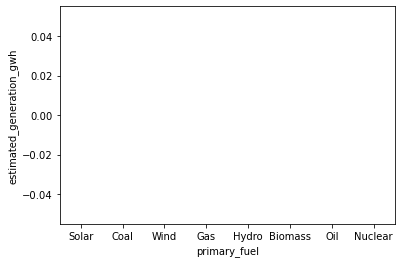

In [24]:
ax = sns.barplot(x="primary_fuel", y="estimated_generation_gwh", data=data)

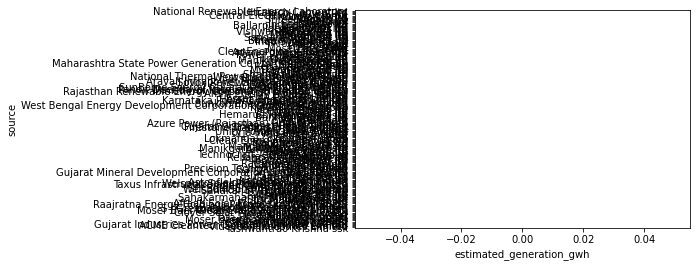

In [13]:
ax = sns.barplot(x="estimated_generation_gwh", y="source", data=data)


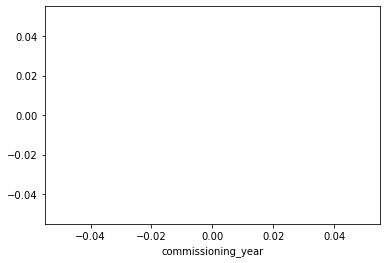

In [25]:
ax = sns.scatterplot(x="commissioning_year", y="estimated_generation_gwh", data=data)

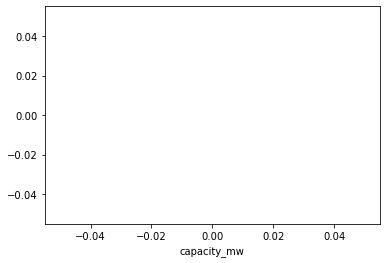

In [26]:
ax = sns.scatterplot(x="capacity_mw", y="estimated_generation_gwh", data=data)

Capasity and commissioning year is not related with estimated generation gwh



In [27]:
the_mean = data.groupby('primary_fuel').mean()


In [28]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plot

In [29]:
X = the_mean['capacity_mw']
y = the_mean['estimated_generation_gwh']

In [ ]:
reg = LinearRegression()
reg = reg.fit(X.values.reshape(-1,1),y)
Predictions = reg.predict(X.values.reshape(-1,1))

In [ ]:
plot.scatter(X, y, color = 'red')
plot.plot(X, Predictions, color = 'blue')
plot.title('RelationShip between Capasity and expected gwh')
plot.xlabel('Capasity')
plot.ylabel('Expected gwh')
plot.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y,predictions)

In [31]:
the_mean = the_mean.sort_values('capacity_mw')


In [32]:
the_mean['weights'] = list(the_mean['estimated_generation_gwh'] / the_mean['capacity_mw'])


In [33]:
the_mean['weights'] = the_mean['weights'] / the_mean['weights'].sum() * 1000


In [34]:
the_mean['the_adjusted_ratio'] = the_mean['weights'] * the_mean['capacity_mw']


In [35]:
the_mean


,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh,total_generation,weights,the_adjusted_ratio
primary_fuel,,,,,,,,,,,,,,,,
Biomass,20.065200,17.460458,75.679052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Solar,21.712598,24.095380,74.352328,NaN,2013.375000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wind,33.429675,17.857224,74.181553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oil,94.230476,17.077728,75.135789,NaN,1994.846154,NaN,2018.0,178.288420,167.747419,19.900912,4.397132,0.146537,NaN,402.791109,NaN,NaN
Hydro,185.326280,22.237016,78.781754,NaN,1988.588000,NaN,2018.0,821.529637,780.429852,709.991238,699.318079,693.884741,NaN,3719.709903,NaN,NaN
Gas,364.114072,20.050144,78.408238,NaN,2002.711864,NaN,2018.0,835.803809,756.601441,840.159648,826.305503,881.216187,NaN,4416.326498,NaN,NaN
Coal,777.695830,21.705709,79.419135,NaN,2005.526316,NaN,2018.0,4493.453506,4692.273779,4604.724388,4716.468158,4821.923826,NaN,25131.484707,NaN,NaN
Nuclear,975.555556,18.081478,76.124056,NaN,1994.250000,NaN,2018.0,5068.098000,4867.556164,4234.875000,4272.608750,4323.415000,NaN,24601.321333,NaN,NaN


In [36]:
X = the_mean['the_adjusted_ratio']
y = the_mean['estimated_generation_gwh']

In [ ]:
reg = LinearRegression()
reg = reg.fit(X.values.reshape(-1,1),y)
predictions = reg.predict(X.values.reshape(-1,1))

In [ ]:
plot.scatter(X, y, color = 'red')
plot.plot(X, predictions, color = 'blue')
plot.title('RelationShip between Capasity and expected gwh')
plot.xlabel('Capasity')
plot.ylabel('Expected gwh')
plot.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y,predictions)

In [40]:
dictionary_of_coefficients = dict(zip(the_mean.index, the_mean['the_adjusted_ratio']))

In [41]:
dictionary_of_coefficients

{'Biomass': nan,
 'Solar': nan,
 'Wind': nan,
 'Oil': nan,
 'Hydro': nan,
 'Gas': nan,
 'Coal': nan,
 'Nuclear': nan}

We have coefficents for every type of energy power plant. We will use them for calculating every expected gwh as the formula:

exp_gwh = coefficient_of_fuel * capasity



In [42]:
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh,total_generation
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN,3643.093120
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN,22248.789736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for index,row in data.iterrows():
    for name in data.primary_fuel.unique():
        if row['primary_fuel'] == name:
            data.loc[index,'predicted_gwh'] = (dictionary_of_coefficients[name] * row['capacity_mw'])
            
from sklearn.metrics import mean_squared_error
mean_squared_error(data['estimated_generation_gwh'], data['predicted_gwh'])

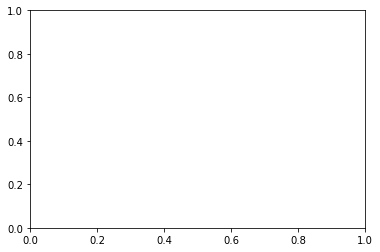

In [44]:
ax = sns.scatterplot(x="estimated_generation_gwh", y="predicted_gwh", data=data)

In [ ]:
from sklearn.metrics import r2_score
r2_score(data['estimated_generation_gwh'], data['predicted_gwh'])

In the end with testing data, we optimize the coefficients and the final coefficients for fuel source

In [46]:
dictionary_of_coefficients

{'Biomass': nan,
 'Solar': nan,
 'Wind': nan,
 'Oil': nan,
 'Hydro': nan,
 'Gas': nan,
 'Coal': nan,
 'Nuclear': nan}

In [47]:
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh,total_generation,predicted_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN,3643.093120,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN,22248.789736,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN,NaN,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
the_mean = data.groupby('primary_fuel').mean()

In [49]:
the_mean['new_ratios'] = the_mean['predicted_gwh'] / the_mean['estimated_generation_gwh']

In [50]:
the_mean

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh,total_generation,predicted_gwh,new_ratios
primary_fuel,,,,,,,,,,,,,,,,
Biomass,20.065200,17.460458,75.679052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Coal,777.695830,21.705709,79.419135,NaN,2005.526316,NaN,2018.0,4493.453506,4692.273779,4604.724388,4716.468158,4821.923826,NaN,25131.484707,NaN,NaN
Gas,364.114072,20.050144,78.408238,NaN,2002.711864,NaN,2018.0,835.803809,756.601441,840.159648,826.305503,881.216187,NaN,4416.326498,NaN,NaN
Hydro,185.326280,22.237016,78.781754,NaN,1988.588000,NaN,2018.0,821.529637,780.429852,709.991238,699.318079,693.884741,NaN,3719.709903,NaN,NaN
Nuclear,975.555556,18.081478,76.124056,NaN,1994.250000,NaN,2018.0,5068.098000,4867.556164,4234.875000,4272.608750,4323.415000,NaN,24601.321333,NaN,NaN
Oil,94.230476,17.077728,75.135789,NaN,1994.846154,NaN,2018.0,178.288420,167.747419,19.900912,4.397132,0.146537,NaN,402.791109,NaN,NaN
Solar,21.712598,24.095380,74.352328,NaN,2013.375000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wind,33.429675,17.857224,74.181553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
dictionary_of_coefficients

{'Biomass': nan,
 'Solar': nan,
 'Wind': nan,
 'Oil': nan,
 'Hydro': nan,
 'Gas': nan,
 'Coal': nan,
 'Nuclear': nan}

In [52]:
for name in the_mean.index:
    dictionary_of_coefficients[name] =  dictionary_of_coefficients[name] / the_mean.loc[name,'new_ratios']

In [53]:
dictionary_of_coefficients

{'Biomass': nan,
 'Solar': nan,
 'Wind': nan,
 'Oil': nan,
 'Hydro': nan,
 'Gas': nan,
 'Coal': nan,
 'Nuclear': nan}

In [ ]:
for index,row in data.iterrows():
    for name in data.primary_fuel.unique():
        if row['primary_fuel'] == name:
            data.loc[index,'predicted_gwh'] = (dictionary_of_coefficients[name] * row['capacity_mw'])
            
from sklearn.metrics import mean_squared_error
mean_squared_error(data['estimated_generation_gwh'], data['predicted_gwh'])

In [ ]:
from sklearn.metrics import r2_score
r2_score(data['estimated_generation_gwh'], data['predicted_gwh'])

I regulate the coefficients for fuel with repetative methodolgy. After that the error and r_square is very significant. Thus, we can totally predict the real expected gwh from capasity and type of fuel. Here, I create a methodology to extract information from two features. This methodology can be used for another related features and machine learning stages could be improved

exp_gwh = coefficient_of_fuel * capasity

Global Power Plants Annual Consumption

In [56]:
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh,total_generation,predicted_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN,3643.093120,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN,22248.789736,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN,NaN,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
import pandas as pd
global_power_plant_database = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [ ]:
emmission_mean = emmission_annual.groupby('Energy Source').mean()

In [ ]:
data = pd.concat([global_power_plant_database[['capacity_mw','fuel1']],data])

Now we have all ht plants for capacity and have the coefficients for their fuel type.



In [ ]:
for name in dictionary_of_coefficients:
    data.loc[data['fuel1'] == name,'predicted_gwh'] = (dictionary_of_coefficients[name] * data.loc[data['fuel1'] == name,'capacity_mw'])

Now we have all the predicted annual gwh for all power plants. We can transfor these to the emissions.

In [63]:
dictionary_of_coefficients

{'Biomass': nan,
 'Solar': nan,
 'Wind': nan,
 'Oil': nan,
 'Hydro': nan,
 'Gas': nan,
 'Coal': nan,
 'Nuclear': nan}

In [64]:
average_co2_emissions = {'Coal':909,'Hydro':4,'Solar':105,'Wind':13,'Gas':465,'Oil':821}

In [ ]:
for name in dictionary_of_coefficients:
    data.loc[data['fuel1'] == name,'co2_emissions'] = (average_co2_emissions[name] * data.loc[data['fuel1'] == name,'predicted_gwh']) * 1000000

In [66]:
data.head(30)


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh,total_generation,predicted_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.50,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.00,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.20,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.00,23.8712,91.3602,Gas,NaN,NaN,...,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN,3643.093120,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.00,21.9603,82.4091,Coal,Oil,NaN,...,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN,22248.789736,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.00,23.7689,68.6447,Coal,Oil,NaN,...,2018.0,821.798000,1153.421000,1208.852000,1175.765000,1147.913000,Central Electricity Authority,NaN,5507.749000,NaN
6,IND,India,ALIYAR,IND0000004,60.00,10.4547,77.0078,Hydro,NaN,NaN,...,2018.0,147.568450,157.558250,152.195200,61.421350,89.629600,Central Electricity Authority,NaN,608.372850,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.00,32.2258,77.2070,Hydro,NaN,NaN,...,2018.0,696.738800,674.391100,721.335200,675.724400,679.594950,Central Electricity Authority,NaN,3447.784450,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.00,16.3300,75.8863,Hydro,NaN,NaN,...,2018.0,504.813250,480.594950,144.434200,402.029750,439.372100,Central Electricity Authority,NaN,1971.244250,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.00,23.1642,81.6373,Coal,Oil,NaN,...,2018.0,2642.322000,1887.904000,1643.046000,1338.093000,1563.457000,Central Electricity Authority,NaN,9074.822000,NaN


Total Esmitated Co2 Emission In the World


In [ ]:
data['co2_emissions'].plot(figsize = (15,10))


In [ ]:
data['co2_emissions'].sum() / 1000000


1683217333372.0256 ton co2 emmission is calculated in the world per year

